In [ ]:
MLP快速搭建非线性二分类模型task：
基于task1_data数据，建立mlp模型，实现非线性边界二分类。

1、数据分离:test_size=0.2, random_state=0；
2、建模并训练模型（迭代1000次），计算训练集、测试集准确率；
3、可视化预测结果
4、继续迭代6000次，重复步骤2-3
5、迭代1-10000次（500为间隔），查看迭代过程中的变化(可视化结果、准确率）
模型结构：一层隐藏层，25个神经元，激活函数：sigmoid

In [4]:
# 数据加载
import pandas as pd
import numpy as np
data = pd.read_csv('task1_data.csv')
data.head() #x1 x2相当于数据坐标feature y是相对应的分类标签

,x1,x2,y
0,46.4663,63.4143,1
1,43.5724,61.4890,1
2,41.4073,57.8710,1
3,40.4504,54.0086,1
4,37.3039,56.6732,1


In [9]:
# 数据赋值
X = data.drop(['y'],axis=1) # 删除y列的部分 axis=按列删除
y = data.loc[:,'y']
X.head()

,x1,x2
0,46.4663,63.4143
1,43.5724,61.4890
2,41.4073,57.8710
3,40.4504,54.0086
4,37.3039,56.6732


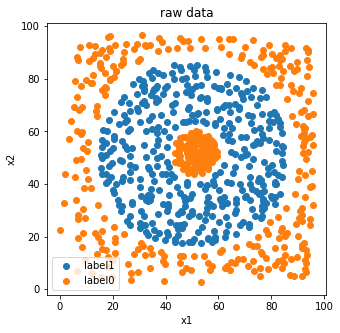

In [19]:
# 数据可视化展示
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(5,5)) 
label1 = plt.scatter(X.loc[:,'x1'][y==1],X.loc[:,'x2'][y==1]) # y==1是在做逻辑判断返回正确的数值对应的指针 再根据索引定位X中的位置
label0 = plt.scatter(X.loc[:,'x1'][y==0],X.loc[:,'x2'][y==0])
plt.legend((label1,label0),('label1','label0')) # 加标签图例
plt.xlabel('x1')
plt.ylabel('x2')# 坐标轴名
plt.title('raw data')# 图片名称
plt.show()

In [22]:
# 数据分离
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)# 固定表达式 输出x/y的训练和测试集 其中test占20%
print(X_train.shape,X_test.shape,X.shape) #训练数据占80% 测试数据占20% 一共788 二维x1/x2

(630, 2) (158, 2) (788, 2)


In [26]:
# mlp模型建立
from keras.models import Sequential
from keras.layers import Dense,Activation
mlp = Sequential()
mlp.add(Dense(units=25,input_dim=2,activation='sigmoid'))# 隐藏层
mlp.add(Dense(units=1,activation='sigmoid'))# 输出层
mlp.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 25)                75        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 26        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [32]:
# 模型参数求解
mlp.compile(optimizer='adam',loss='binary_crossentropy')
# 模型训练
mlp.fit(X_train,y_train,epochs=2500)

Epoch 1/2500
630/630 [==============================] - 0s 145us/step - loss: 0.0034
Epoch 2/2500
630/630 [==============================] - 0s 28us/step - loss: 0.0027
Epoch 3/2500
630/630 [==============================] - 0s 29us/step - loss: 0.0032
Epoch 4/2500
630/630 [==============================] - 0s 29us/step - loss: 0.0022
Epoch 5/2500
630/630 [==============================] - 0s 28us/step - loss: 0.0023
Epoch 6/2500
630/630 [==============================] - 0s 27us/step - loss: 0.0022
Epoch 7/2500
630/630 [==============================] - 0s 27us/step - loss: 0.0021
Epoch 8/2500
630/630 [==============================] - 0s 28us/step - loss: 0.0024
Epoch 9/2500
630/630 [==============================] - 0s 29us/step - loss: 0.0028
Epoch 10/2500
630/630 [==============================] - 0s 27us/step - loss: 0.0020
Epoch 11/2500
630/630 [==============================] - 0s 28us/step - loss: 0.0024
Epoch 12/2500
630/630 [==============================] - 0s 28us/step - l

630/630 [==============================] - 0s 35us/step - loss: 0.0019
Epoch 97/2500
630/630 [==============================] - 0s 32us/step - loss: 0.0019
Epoch 98/2500
630/630 [==============================] - 0s 33us/step - loss: 0.0019
Epoch 99/2500
630/630 [==============================] - ETA: 0s - loss: 0.002 - 0s 32us/step - loss: 0.0018
Epoch 100/2500
630/630 [==============================] - 0s 32us/step - loss: 0.0018
Epoch 101/2500
630/630 [==============================] - 0s 33us/step - loss: 0.0019
Epoch 102/2500
630/630 [==============================] - 0s 33us/step - loss: 0.0018
Epoch 103/2500
630/630 [==============================] - 0s 30us/step - loss: 0.0023
Epoch 104/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0022
Epoch 105/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0020
Epoch 106/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0021
Epoch 107/2500
630/630 [========================

630/630 [==============================] - 0s 38us/step - loss: 0.0017
Epoch 192/2500
630/630 [==============================] - 0s 40us/step - loss: 0.0017
Epoch 193/2500
630/630 [==============================] - 0s 37us/step - loss: 0.0018
Epoch 194/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0022
Epoch 195/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0017
Epoch 196/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0017
Epoch 197/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0018
Epoch 198/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0019
Epoch 199/2500
630/630 [==============================] - 0s 40us/step - loss: 0.0018
Epoch 200/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0017
Epoch 201/2500
630/630 [==============================] - 0s 38us/step - loss: 0.0017
Epoch 202/2500
630/630 [==============================] - 0s 37us/ste

630/630 [==============================] - 0s 35us/step - loss: 0.0026
Epoch 286/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0021
Epoch 287/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0021
Epoch 288/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0020
Epoch 289/2500
630/630 [==============================] - 0s 38us/step - loss: 0.0017
Epoch 290/2500
630/630 [==============================] - 0s 37us/step - loss: 0.0018
Epoch 291/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0019
Epoch 292/2500
630/630 [==============================] - 0s 40us/step - loss: 0.0058
Epoch 293/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0031
Epoch 294/2500
630/630 [==============================] - 0s 34us/step - loss: 0.0033
Epoch 295/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0027
Epoch 296/2500
630/630 [==============================] - 0s 35us/ste

630/630 [==============================] - 0s 41us/step - loss: 0.0020
Epoch 381/2500
630/630 [==============================] - 0s 49us/step - loss: 0.0024
Epoch 382/2500
630/630 [==============================] - 0s 41us/step - loss: 0.0018
Epoch 383/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0026
Epoch 384/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0025
Epoch 385/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0026
Epoch 386/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0030
Epoch 387/2500
630/630 [==============================] - 0s 33us/step - loss: 0.0022
Epoch 388/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0022
Epoch 389/2500
630/630 [==============================] - 0s 33us/step - loss: 0.0018
Epoch 390/2500
630/630 [==============================] - 0s 33us/step - loss: 0.0023
Epoch 391/2500
630/630 [==============================] - 0s 36us/ste

630/630 [==============================] - 0s 38us/step - loss: 0.0024
Epoch 476/2500
630/630 [==============================] - ETA: 0s - loss: 7.5758e-0 - 0s 36us/step - loss: 0.0016
Epoch 477/2500
630/630 [==============================] - 0s 34us/step - loss: 0.0016
Epoch 478/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0016
Epoch 479/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0017
Epoch 480/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0018
Epoch 481/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0017
Epoch 482/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0018
Epoch 483/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0017
Epoch 484/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0017
Epoch 485/2500
630/630 [==============================] - 0s 33us/step - loss: 0.0020
Epoch 486/2500
630/630 [=================

630/630 [==============================] - 0s 35us/step - loss: 0.0023
Epoch 570/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0028
Epoch 571/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0044
Epoch 572/2500
630/630 [==============================] - 0s 34us/step - loss: 0.0025
Epoch 573/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0018
Epoch 574/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0016
Epoch 575/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0016
Epoch 576/2500
630/630 [==============================] - 0s 33us/step - loss: 0.0017
Epoch 577/2500
630/630 [==============================] - 0s 33us/step - loss: 0.0016
Epoch 578/2500
630/630 [==============================] - 0s 38us/step - loss: 0.0019
Epoch 579/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0022
Epoch 580/2500
630/630 [==============================] - 0s 36us/ste

630/630 [==============================] - 0s 33us/step - loss: 0.0047
Epoch 665/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0030
Epoch 666/2500
630/630 [==============================] - 0s 38us/step - loss: 0.0017
Epoch 667/2500
630/630 [==============================] - 0s 37us/step - loss: 0.0016
Epoch 668/2500
630/630 [==============================] - 0s 33us/step - loss: 0.0017
Epoch 669/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0017
Epoch 670/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0021
Epoch 671/2500
630/630 [==============================] - 0s 34us/step - loss: 0.0019
Epoch 672/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0021
Epoch 673/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0017
Epoch 674/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0017
Epoch 675/2500
630/630 [==============================] - 0s 36us/ste

630/630 [==============================] - 0s 35us/step - loss: 0.0355
Epoch 759/2500
630/630 [==============================] - 0s 33us/step - loss: 0.0113
Epoch 760/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0044
Epoch 761/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0021
Epoch 762/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0018
Epoch 763/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0018
Epoch 764/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0017
Epoch 765/2500
630/630 [==============================] - 0s 38us/step - loss: 0.0016
Epoch 766/2500
630/630 [==============================] - 0s 34us/step - loss: 0.0016
Epoch 767/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0016
Epoch 768/2500
630/630 [==============================] - ETA: 0s - loss: 3.8419e-0 - 0s 36us/step - loss: 0.0016
Epoch 769/2500
630/630 [=================

630/630 [==============================] - 0s 35us/step - loss: 0.0017
Epoch 853/2500
630/630 [==============================] - 0s 33us/step - loss: 0.0016
Epoch 854/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0015
Epoch 855/2500
630/630 [==============================] - 0s 40us/step - loss: 0.0015
Epoch 856/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0015
Epoch 857/2500
630/630 [==============================] - 0s 33us/step - loss: 0.0016
Epoch 858/2500
630/630 [==============================] - 0s 33us/step - loss: 0.0015
Epoch 859/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0015
Epoch 860/2500
630/630 [==============================] - 0s 33us/step - loss: 0.0016
Epoch 861/2500
630/630 [==============================] - 0s 32us/step - loss: 0.0016
Epoch 862/2500
630/630 [==============================] - 0s 33us/step - loss: 0.0016
Epoch 863/2500
630/630 [==============================] - 0s 35us/ste

630/630 [==============================] - 0s 36us/step - loss: 0.0194
Epoch 948/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0631
Epoch 949/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0107
Epoch 950/2500
630/630 [==============================] - 0s 38us/step - loss: 0.0064
Epoch 951/2500
630/630 [==============================] - 0s 40us/step - loss: 0.0021
Epoch 952/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0017
Epoch 953/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0016
Epoch 954/2500
630/630 [==============================] - 0s 33us/step - loss: 0.0015
Epoch 955/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0015
Epoch 956/2500
630/630 [==============================] - 0s 33us/step - loss: 0.0015
Epoch 957/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0014
Epoch 958/2500
630/630 [==============================] - 0s 35us/ste

Epoch 1042/2500
630/630 [==============================] - 0s 38us/step - loss: 0.0014
Epoch 1043/2500
630/630 [==============================] - 0s 38us/step - loss: 0.0015
Epoch 1044/2500
630/630 [==============================] - 0s 40us/step - loss: 0.0015
Epoch 1045/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0016
Epoch 1046/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0015
Epoch 1047/2500
630/630 [==============================] - 0s 39us/step - loss: 0.0015
Epoch 1048/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0016
Epoch 1049/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0018
Epoch 1050/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0016
Epoch 1051/2500
630/630 [==============================] - 0s 38us/step - loss: 0.0015
Epoch 1052/2500
630/630 [==============================] - 0s 37us/step - loss: 0.0015
Epoch 1053/2500
630/630 [==================

630/630 [==============================] - 0s 36us/step - loss: 0.0014
Epoch 1136/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0015
Epoch 1137/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0014
Epoch 1138/2500
630/630 [==============================] - 0s 40us/step - loss: 0.0014
Epoch 1139/2500
630/630 [==============================] - 0s 43us/step - loss: 0.0015
Epoch 1140/2500
630/630 [==============================] - 0s 38us/step - loss: 0.0014
Epoch 1141/2500
630/630 [==============================] - 0s 40us/step - loss: 0.0015
Epoch 1142/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0015
Epoch 1143/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0014
Epoch 1144/2500
630/630 [==============================] - 0s 33us/step - loss: 0.0016
Epoch 1145/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0015
Epoch 1146/2500
630/630 [==============================] - 

630/630 [==============================] - 0s 36us/step - loss: 0.0013
Epoch 1229/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0014
Epoch 1230/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0014
Epoch 1231/2500
630/630 [==============================] - 0s 38us/step - loss: 0.0013
Epoch 1232/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0014
Epoch 1233/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0013
Epoch 1234/2500
630/630 [==============================] - 0s 40us/step - loss: 0.0014
Epoch 1235/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0014
Epoch 1236/2500
630/630 [==============================] - 0s 43us/step - loss: 0.0013
Epoch 1237/2500
630/630 [==============================] - 0s 38us/step - loss: 0.0014
Epoch 1238/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0014
Epoch 1239/2500
630/630 [==============================] - 

630/630 [==============================] - 0s 33us/step - loss: 0.0014
Epoch 1322/2500
630/630 [==============================] - 0s 37us/step - loss: 0.0014
Epoch 1323/2500
630/630 [==============================] - 0s 33us/step - loss: 0.0015
Epoch 1324/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0017
Epoch 1325/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0014
Epoch 1326/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0018
Epoch 1327/2500
630/630 [==============================] - 0s 40us/step - loss: 0.0018
Epoch 1328/2500
630/630 [==============================] - 0s 33us/step - loss: 0.0014
Epoch 1329/2500
630/630 [==============================] - 0s 33us/step - loss: 0.0015
Epoch 1330/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0015
Epoch 1331/2500
630/630 [==============================] - 0s 33us/step - loss: 0.0016
Epoch 1332/2500
630/630 [==============================] - 

630/630 [==============================] - 0s 38us/step - loss: 0.0013
Epoch 1416/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0013
Epoch 1417/2500
630/630 [==============================] - 0s 37us/step - loss: 0.0014
Epoch 1418/2500
630/630 [==============================] - ETA: 0s - loss: 0.001 - 0s 36us/step - loss: 0.0014
Epoch 1419/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0015
Epoch 1420/2500
630/630 [==============================] - ETA: 0s - loss: 0.001 - 0s 40us/step - loss: 0.0014
Epoch 1421/2500
630/630 [==============================] - 0s 34us/step - loss: 0.0014
Epoch 1422/2500
630/630 [==============================] - 0s 33us/step - loss: 0.0013
Epoch 1423/2500
630/630 [==============================] - 0s 33us/step - loss: 0.0013
Epoch 1424/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0014
Epoch 1425/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0014
Epoch 1426/

630/630 [==============================] - 0s 35us/step - loss: 0.0013
Epoch 1509/2500
630/630 [==============================] - 0s 37us/step - loss: 0.0014
Epoch 1510/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0016
Epoch 1511/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0013
Epoch 1512/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0013
Epoch 1513/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0014
Epoch 1514/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0013
Epoch 1515/2500
630/630 [==============================] - 0s 34us/step - loss: 0.0013
Epoch 1516/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0013
Epoch 1517/2500
630/630 [==============================] - 0s 32us/step - loss: 0.0013
Epoch 1518/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0014
Epoch 1519/2500
630/630 [==============================] - 

630/630 [==============================] - 0s 36us/step - loss: 0.0012
Epoch 1603/2500
630/630 [==============================] - 0s 46us/step - loss: 0.0013
Epoch 1604/2500
630/630 [==============================] - 0s 41us/step - loss: 0.0014
Epoch 1605/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0014
Epoch 1606/2500
630/630 [==============================] - 0s 38us/step - loss: 0.0013
Epoch 1607/2500
630/630 [==============================] - 0s 37us/step - loss: 0.0013
Epoch 1608/2500
630/630 [==============================] - 0s 38us/step - loss: 0.0013
Epoch 1609/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0013
Epoch 1610/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0013
Epoch 1611/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0014
Epoch 1612/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0013
Epoch 1613/2500
630/630 [==============================] - 

630/630 [==============================] - 0s 38us/step - loss: 0.0013
Epoch 1696/2500
630/630 [==============================] - 0s 38us/step - loss: 0.0013
Epoch 1697/2500
630/630 [==============================] - 0s 38us/step - loss: 0.0015
Epoch 1698/2500
630/630 [==============================] - 0s 33us/step - loss: 0.0014
Epoch 1699/2500
630/630 [==============================] - 0s 33us/step - loss: 0.0014
Epoch 1700/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0013
Epoch 1701/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0015
Epoch 1702/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0012
Epoch 1703/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0015
Epoch 1704/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0015
Epoch 1705/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0017
Epoch 1706/2500
630/630 [==============================] - 

630/630 [==============================] - 0s 35us/step - loss: 0.0015
Epoch 1790/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0014
Epoch 1791/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0019
Epoch 1792/2500
630/630 [==============================] - 0s 33us/step - loss: 0.0018
Epoch 1793/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0016
Epoch 1794/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0013
Epoch 1795/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0012
Epoch 1796/2500
630/630 [==============================] - 0s 33us/step - loss: 0.0016
Epoch 1797/2500
630/630 [==============================] - 0s 33us/step - loss: 0.0017
Epoch 1798/2500
630/630 [==============================] - 0s 33us/step - loss: 0.0020
Epoch 1799/2500
630/630 [==============================] - 0s 33us/step - loss: 0.0023
Epoch 1800/2500
630/630 [==============================] - 

630/630 [==============================] - 0s 38us/step - loss: 0.0013
Epoch 1884/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0013
Epoch 1885/2500
630/630 [==============================] - 0s 33us/step - loss: 0.0013
Epoch 1886/2500
630/630 [==============================] - 0s 33us/step - loss: 0.0012
Epoch 1887/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0012
Epoch 1888/2500
630/630 [==============================] - 0s 32us/step - loss: 0.0013
Epoch 1889/2500
630/630 [==============================] - 0s 33us/step - loss: 0.0014
Epoch 1890/2500
630/630 [==============================] - 0s 33us/step - loss: 0.0012
Epoch 1891/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0013
Epoch 1892/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0012
Epoch 1893/2500
630/630 [==============================] - 0s 33us/step - loss: 0.0013
Epoch 1894/2500
630/630 [==============================] - 

630/630 [==============================] - 0s 36us/step - loss: 0.0012
Epoch 1978/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0012
Epoch 1979/2500
630/630 [==============================] - 0s 37us/step - loss: 0.0012
Epoch 1980/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0013
Epoch 1981/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0012
Epoch 1982/2500
630/630 [==============================] - 0s 40us/step - loss: 0.0013
Epoch 1983/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0012
Epoch 1984/2500
630/630 [==============================] - 0s 37us/step - loss: 0.0012
Epoch 1985/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0012
Epoch 1986/2500
630/630 [==============================] - 0s 33us/step - loss: 0.0012
Epoch 1987/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0012
Epoch 1988/2500
630/630 [==============================] - 

630/630 [==============================] - 0s 35us/step - loss: 0.0012
Epoch 2071/2500
630/630 [==============================] - 0s 44us/step - loss: 0.0012
Epoch 2072/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0012
Epoch 2073/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0012
Epoch 2074/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0012
Epoch 2075/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0012
Epoch 2076/2500
630/630 [==============================] - 0s 40us/step - loss: 0.0011
Epoch 2077/2500
630/630 [==============================] - 0s 33us/step - loss: 0.0011
Epoch 2078/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0011
Epoch 2079/2500
630/630 [==============================] - 0s 34us/step - loss: 0.0012
Epoch 2080/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0012
Epoch 2081/2500
630/630 [==============================] - 

630/630 [==============================] - 0s 36us/step - loss: 0.0013
Epoch 2165/2500
630/630 [==============================] - 0s 41us/step - loss: 0.0012
Epoch 2166/2500
630/630 [==============================] - 0s 40us/step - loss: 0.0013
Epoch 2167/2500
630/630 [==============================] - 0s 40us/step - loss: 0.0016
Epoch 2168/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0014
Epoch 2169/2500
630/630 [==============================] - 0s 38us/step - loss: 0.0014
Epoch 2170/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0015
Epoch 2171/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0013
Epoch 2172/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0013
Epoch 2173/2500
630/630 [==============================] - 0s 41us/step - loss: 0.0014
Epoch 2174/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0015
Epoch 2175/2500
630/630 [==============================] - 

630/630 [==============================] - 0s 35us/step - loss: 0.0054
Epoch 2259/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0041
Epoch 2260/2500
630/630 [==============================] - 0s 38us/step - loss: 0.0046
Epoch 2261/2500
630/630 [==============================] - 0s 51us/step - loss: 0.0036
Epoch 2262/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0017
Epoch 2263/2500
630/630 [==============================] - 0s 38us/step - loss: 0.0013
Epoch 2264/2500
630/630 [==============================] - 0s 40us/step - loss: 0.0013
Epoch 2265/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0012
Epoch 2266/2500
630/630 [==============================] - 0s 38us/step - loss: 0.0012
Epoch 2267/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0012
Epoch 2268/2500
630/630 [==============================] - 0s 41us/step - loss: 0.0012
Epoch 2269/2500
630/630 [==============================] - 

630/630 [==============================] - 0s 46us/step - loss: 0.0012
Epoch 2352/2500
630/630 [==============================] - 0s 52us/step - loss: 0.0012
Epoch 2353/2500
630/630 [==============================] - 0s 41us/step - loss: 0.0011
Epoch 2354/2500
630/630 [==============================] - 0s 46us/step - loss: 0.0012
Epoch 2355/2500
630/630 [==============================] - 0s 54us/step - loss: 0.0012
Epoch 2356/2500
630/630 [==============================] - 0s 46us/step - loss: 0.0011
Epoch 2357/2500
630/630 [==============================] - 0s 46us/step - loss: 0.0011
Epoch 2358/2500
630/630 [==============================] - 0s 51us/step - loss: 0.0013
Epoch 2359/2500
630/630 [==============================] - 0s 44us/step - loss: 0.0013
Epoch 2360/2500
630/630 [==============================] - 0s 49us/step - loss: 0.0017
Epoch 2361/2500
630/630 [==============================] - 0s 47us/step - loss: 0.0013
Epoch 2362/2500
630/630 [==============================] - 

630/630 [==============================] - 0s 36us/step - loss: 0.0011
Epoch 2446/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0011
Epoch 2447/2500
630/630 [==============================] - 0s 38us/step - loss: 0.0011
Epoch 2448/2500
630/630 [==============================] - 0s 33us/step - loss: 0.0011
Epoch 2449/2500
630/630 [==============================] - 0s 36us/step - loss: 0.0011
Epoch 2450/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0011
Epoch 2451/2500
630/630 [==============================] - 0s 33us/step - loss: 0.0011
Epoch 2452/2500
630/630 [==============================] - 0s 35us/step - loss: 0.0011
Epoch 2453/2500
630/630 [==============================] - 0s 38us/step - loss: 0.0011
Epoch 2454/2500
630/630 [==============================] - 0s 38us/step - loss: 0.0011
Epoch 2455/2500
630/630 [==============================] - 0s 38us/step - loss: 0.0013
Epoch 2456/2500
630/630 [==============================] - 

In [34]:
# 模型预测及表现评估
y_train_predict = mlp.predict_classes(X_train)
print(y_train_predict) # 模型预测训练值

[[0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]


In [36]:
# 准确率表现评估
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train,y_train_predict)
print(accuracy_train)

1.0


In [37]:
# 测试集预测及表现评估
y_test_predict = mlp.predict_classes(X_test)
print(y_test_predict) # 模型预测训练值

[[0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]]


In [38]:
# 测试集预测结果准确率
accuracy_test = accuracy_score(y_test,y_test_predict)
print(accuracy_test)

0.9873417721518988


In [40]:
# 结果可视化展示
# 生成新的数据点用于画出决策边界
xx,yy = np.meshgrid(np.arange(0,100,1),np.arange(0,100,1))
x_range = np.c_[xx.ravel(),yy.ravel()]
print(x_range)

[[ 0  0]
 [ 1  0]
 [ 2  0]
 ...
 [97 99]
 [98 99]
 [99 99]]


In [43]:
# 生成数据点类别
y_range_predict = mlp.predict_classes(x_range)
print(y_range_predict)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [46]:
# ndarray格式不能用于索引
# 格式转换
# 转换为series格式
y_range_predict_format = pd.Series(i[0] for i in y_range_predict) # 取单个数值[0]/[1] 从哪里取
print(y_range_format) # 生成指针


0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Length: 10000, dtype: int64


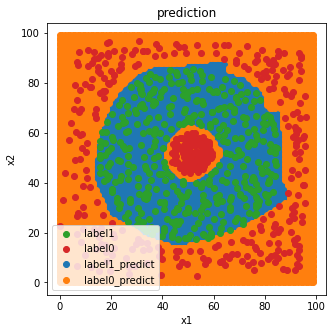

In [50]:
# 数据可视化展示
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(5,5)) 
label1_predict = plt.scatter(x_range[:,0][y_range_predict_format==1],x_range[:,1][y_range_predict_format==1])# 将所有图片上的点进行分类
label0_predict = plt.scatter(x_range[:,0][y_range_predict_format==0],x_range[:,1][y_range_predict_format==0])
label1 = plt.scatter(X.loc[:,'x1'][y==1],X.loc[:,'x2'][y==1]) # y==1是在做逻辑判断返回正确的数值对应的指针 再根据索引定位X中的位置
label0 = plt.scatter(X.loc[:,'x1'][y==0],X.loc[:,'x2'][y==0])
plt.legend((label1,label0,label1_predict,label0_predict),('label1','label0','label1_predict','label0_predict')) # 加标签图例
plt.xlabel('x1')
plt.ylabel('x2')# 坐标轴名
plt.title('prediction')# 图片名称
plt.show()